# cyberbulling tweet project is done by 
##Roaa Sufi Abdulla
##Fatma gamal samir
##Haider khalid
##Mustafa muhammed

## 1)import liberaries

In [1]:

import numpy as np
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import string
from collections import Counter
from nltk.stem import PorterStemmer
import emoji
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


pd.set_option('display.max_colwidth', None)


##2) Read data

In [2]:
df=pd.read_csv('/content/08 cyberbullying_tweets.csv',encoding='latin-1')


In [3]:
df.shape

(47692, 2)

##3)processing data

##3.1) dealing with nulls

In [4]:
# show #of Nulls
df.isna().sum()


tweet_text            12
cyberbullying_type     4
dtype: int64

In [5]:
# romive Nulls
df.dropna(inplace=True)

In [6]:
# reset index
df.reset_index(inplace=True)
df.drop(['index'],axis=1,inplace=True)

In [7]:
df.isna().sum()

tweet_text            0
cyberbullying_type    0
dtype: int64

In [8]:
df[:20]

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was crapilicious! #mkr",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImACelebrityAU #today #sunrise #studio10 #Neighbours #WonderlandTen #etc,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red velvet cupcakes?,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, but not too concerned about another angry dude on twitter.",not_cyberbullying
4,"@RudhoeEnglish This is an ISIS account pretending to be a Kurdish account. Like Islam, it is all lies.",not_cyberbullying
5,"@Raja5aab @Quickieleaks Yes, the test of god is that good or bad or indifferent or weird or whatever, it all proves gods existence.",not_cyberbullying
6,Itu sekolah ya bukan tempat bully! Ga jauh kaya neraka,not_cyberbullying
7,Karma. I hope it bites Kat on the butt. She is just nasty. #mkr,not_cyberbullying
8,@stockputout everything but mostly my priest,not_cyberbullying
9,Rebecca Black Drops Out of School Due to Bullying:,not_cyberbullying


##3.2) type of classes & dupliceded data

In [9]:
# result show data balanced for all classes
df['cyberbullying_type'].value_counts()


religion               7998
age                    7985
gender                 7969
ethnicity              7961
not_cyberbullying      7940
other_cyberbullying    7823
Name: cyberbullying_type, dtype: int64

In [10]:
df.nunique()

tweet_text            45991
cyberbullying_type        6
dtype: int64

In [11]:
df['tweet_text'].nunique()

45991

In [12]:
# show #of duplicated 
df['tweet_text'].duplicated().sum()

1685

In [13]:
#remove duplicated data & reset index
df.drop_duplicates("tweet_text", inplace = True)
df.reset_index(inplace=True)
df.drop(['index'],axis=1,inplace=True)

###3.3) Data Cleaning

In [14]:
 # Remove URLs, mentions,special char and hashtags from the text
def clean_link(lnk):
  lnk_pattern = re.compile(r'http\S+|www.\S+|<.*?>\S+|@\S+|#\S+|[^A-Za-z]+')
  return lnk_pattern.sub(r' ',lnk)


In [15]:
# convert all capital letters to lower
def lower(text):
    return text.lower()

In [16]:
 #Remove frequantly letter =3 or more consecutive letters replacing 2 letter
    #becuse no word in english have 3 or more consecutive letters 
def frequantly_letter(letter):
    consecutive_letter=re.compile(r'(.)\1\1+')
    return consecutive_letter.sub(r'\1\1',letter)

In [17]:
# remove numbers
def remove_digits(num):
  digits_num=re.compile(r'[0-9]')
  return digits_num.sub(r'',num)

In [18]:
#Remove multiple sequential spaces
def remove_mult_spaces(text):
    return re.sub("\s\s+" , " ", text)

In [19]:
# remove stop words
STOPWORDS = set(stopwords.words('english'))
STOPWORDS.update(['rt', 'mkr', 'didn', 'bc', 'n', 'm', 
                  'im', 'll', 'y', 've', 'u', 'ur', 'don', 
                  'p', 't', 's', 'aren', 'kp', 'o', 'kat', 
                  'de', 're', 'amp', 'will', 'wa', 'e'])
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

In [20]:
# stemming for words
def stemmer(text):
    tokenized = nltk.word_tokenize(text)
    ps = PorterStemmer()
    return ' '.join([ps.stem(words) for words in tokenized])

In [21]:
# remove emojis in text
def remove_emoji(text):
  return emoji.replace_emoji(text,replace='')

In [22]:
# collect functions of cleaned data
def clean_text(text):
    
    text = remove_emoji(text)
    text = clean_link(text)
    text = frequantly_letter(text)
    text = remove_digits(text)
    text = remove_mult_spaces(text)
    text = lower(text)
    text = remove_stopwords(text)
    text = stemmer(text)
    
    return text

In [23]:
# New columns contains cleaned data

df['cleaned_text'] = df['tweet_text'].apply(clean_text)


In [24]:
df[:20]

,tweet_text,cyberbullying_type,cleaned_text
0,"In other words #katandandre, your food was crapilicious! #mkr",not_cyberbullying,word katandandr food crapilici
1,Why is #aussietv so white? #MKR #theblock #ImACelebrityAU #today #sunrise #studio10 #Neighbours #WonderlandTen #etc,not_cyberbullying,aussietv white theblock imacelebrityau today sunris studio neighbour wonderlandten etc
2,@XochitlSuckkks a classy whore? Or more red velvet cupcakes?,not_cyberbullying,classi whore red velvet cupcak
3,"@Jason_Gio meh. :P thanks for the heads up, but not too concerned about another angry dude on twitter.",not_cyberbullying,meh thank head concern anoth angri dude twitter
4,"@RudhoeEnglish This is an ISIS account pretending to be a Kurdish account. Like Islam, it is all lies.",not_cyberbullying,isi account pretend kurdish account like islam lie
5,"@Raja5aab @Quickieleaks Yes, the test of god is that good or bad or indifferent or weird or whatever, it all proves gods existence.",not_cyberbullying,quickieleak ye test god good bad indiffer weird whatev prove god exist
6,Itu sekolah ya bukan tempat bully! Ga jauh kaya neraka,not_cyberbullying,itu sekolah ya bukan tempat bulli ga jauh kaya neraka
7,Karma. I hope it bites Kat on the butt. She is just nasty. #mkr,not_cyberbullying,karma hope bite butt nasti
8,@stockputout everything but mostly my priest,not_cyberbullying,everyth mostli priest
9,Rebecca Black Drops Out of School Due to Bullying:,not_cyberbullying,rebecca black drop school due bulli


### 3.4)Handle dupliceted for cleaned data

In [25]:
# show duplicated after cleaning data
df['cleaned_text'].duplicated().sum()

1285

In [26]:
# removing duplicated text & reset index

df.drop_duplicates("cleaned_text", inplace = True)
df.reset_index(inplace=True)
df.drop(['index'],axis=1,inplace=True)


In [27]:
df

,tweet_text,cyberbullying_type,cleaned_text
0,"In other words #katandandre, your food was crapilicious! #mkr",not_cyberbullying,word katandandr food crapilici
1,Why is #aussietv so white? #MKR #theblock #ImACelebrityAU #today #sunrise #studio10 #Neighbours #WonderlandTen #etc,not_cyberbullying,aussietv white theblock imacelebrityau today sunris studio neighbour wonderlandten etc
2,@XochitlSuckkks a classy whore? Or more red velvet cupcakes?,not_cyberbullying,classi whore red velvet cupcak
3,"@Jason_Gio meh. :P thanks for the heads up, but not too concerned about another angry dude on twitter.",not_cyberbullying,meh thank head concern anoth angri dude twitter
4,"@RudhoeEnglish This is an ISIS account pretending to be a Kurdish account. Like Islam, it is all lies.",not_cyberbullying,isi account pretend kurdish account like islam lie
...,...,...,...
44701,"Black ppl aren't expected to do anything, depended on for anything. Yet free to participate, work, enjoy the freedom of humans all across this globe. If you waste your energy on the past you will be wasting it for building the future.",ethnicity,black ppl expect anyth depend anyth yet free particip work enjoy freedom human across globe wast energi past wast build futur
44702,Turner did not withhold his disappointment. Turner called the court an âabominable conclave of negro hating demonsâ (with one exception) who âissued another decree that colored men and women must be driven into Jim Crow cars whenever it suits the whim of any white community.â,ethnicity,turner withhold disappoint turner call court abomin conclav negro hate demon one except issu anoth decre color men women must driven jim crow car whenev suit whim white commun
44703,I swear to God. This dumb nigger bitch. I have got to bleach my hair reeeeeal fuckin' soon. D:&lt; FUCK.,ethnicity,swear god dumb nigger bitch got bleach hair reeal fuckin soon lt fuck
44704,"Yea fuck you RT @therealexel: IF YOURE A NIGGER FUCKING UNFOLLOW ME, FUCKING DUMB NIGGERS.",ethnicity,yea fuck therealexel your nigger fuck unfollow fuck dumb nigger


In [28]:
# show length of each text beacuse found empty row # 10 in cleaned text you have to be dropped
text_len = []
for text in df.cleaned_text:
    tweet_len = len(text)
    text_len.append(tweet_len)
df['text_len'] = text_len


In [29]:
# remove text without words(empty)
df = df[df['text_len']!=0]
df.reset_index(inplace=True)
df.drop(['index'],axis=1,inplace=True)



<ipython-input-29-1ba4e535ef9a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['index'],axis=1,inplace=True)


In [30]:
df

,tweet_text,cyberbullying_type,cleaned_text,text_len
0,"In other words #katandandre, your food was crapilicious! #mkr",not_cyberbullying,word katandandr food crapilici,30
1,Why is #aussietv so white? #MKR #theblock #ImACelebrityAU #today #sunrise #studio10 #Neighbours #WonderlandTen #etc,not_cyberbullying,aussietv white theblock imacelebrityau today sunris studio neighbour wonderlandten etc,86
2,@XochitlSuckkks a classy whore? Or more red velvet cupcakes?,not_cyberbullying,classi whore red velvet cupcak,30
3,"@Jason_Gio meh. :P thanks for the heads up, but not too concerned about another angry dude on twitter.",not_cyberbullying,meh thank head concern anoth angri dude twitter,47
4,"@RudhoeEnglish This is an ISIS account pretending to be a Kurdish account. Like Islam, it is all lies.",not_cyberbullying,isi account pretend kurdish account like islam lie,50
...,...,...,...,...
44700,"Black ppl aren't expected to do anything, depended on for anything. Yet free to participate, work, enjoy the freedom of humans all across this globe. If you waste your energy on the past you will be wasting it for building the future.",ethnicity,black ppl expect anyth depend anyth yet free particip work enjoy freedom human across globe wast energi past wast build futur,125
44701,Turner did not withhold his disappointment. Turner called the court an âabominable conclave of negro hating demonsâ (with one exception) who âissued another decree that colored men and women must be driven into Jim Crow cars whenever it suits the whim of any white community.â,ethnicity,turner withhold disappoint turner call court abomin conclav negro hate demon one except issu anoth decre color men women must driven jim crow car whenev suit whim white commun,175
44702,I swear to God. This dumb nigger bitch. I have got to bleach my hair reeeeeal fuckin' soon. D:&lt; FUCK.,ethnicity,swear god dumb nigger bitch got bleach hair reeal fuckin soon lt fuck,69
44703,"Yea fuck you RT @therealexel: IF YOURE A NIGGER FUCKING UNFOLLOW ME, FUCKING DUMB NIGGERS.",ethnicity,yea fuck therealexel your nigger fuck unfollow fuck dumb nigger,63


<Axes: xlabel='cyberbullying_type', ylabel='count'>

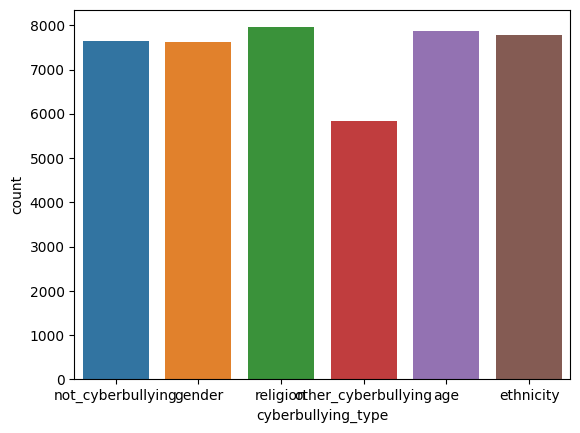

In [31]:
df['cyberbullying_type'].value_counts()
sns.countplot(data= df,x= 'cyberbullying_type')

##4) visualization

In [35]:
# Plotting the top 10 words of each cyberbullying type
for cyber_type in df.cyberbullying_type.unique():
    
    top10_word = df.cleaned_text[df.cyberbullying_type==cyber_type].str.split(expand=True).stack().value_counts()[:10]
    
    fig=px.bar(top10_word, color=top10_word.values, color_continuous_scale=px.colors.sequential.RdPu, custom_data=[top10_word.values])
    fig.update_traces(marker_color='green')
    fig.update_traces(hovertemplate='<b>Count: </b>%{customdata[0]}')
    fig.update_layout(title=f"Top 10 words for {cyber_type}",template='simple_white',hovermode='x unified')
                     
                     
    fig.show()
    

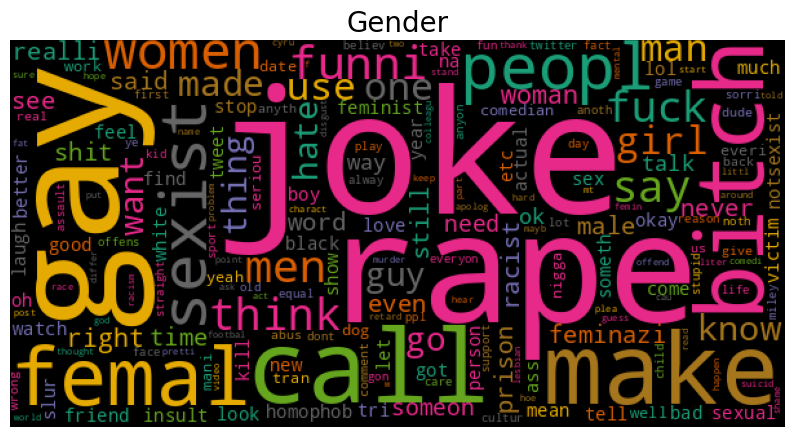

In [36]:
# Using WordCloud tequniue to show most effective words based on type (gender)

plt.figure(figsize=(10,10))
gender_type = df[df['cyberbullying_type']=='gender']
text_gender = gender_type.cleaned_text.values
cloud1=WordCloud(background_color='black',colormap="Dark2",collocations=False,width=600,height=300).generate(" ".join(text_gender))

plt.axis('off')
plt.title("Gender",fontsize=20)
plt.imshow(cloud1)

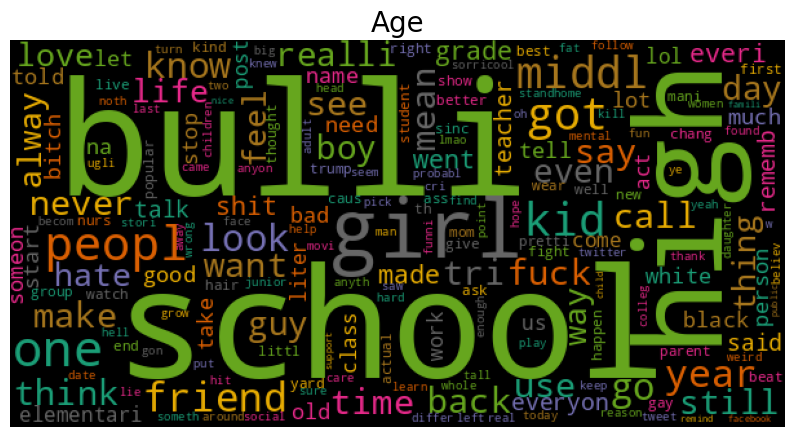

In [37]:
# Using WordCloud tequniue to show most effective words based on type (age)

plt.figure(figsize=(10,10))
gender_type = df[df['cyberbullying_type']=='age']
text_gender = gender_type.cleaned_text.values
cloud2=WordCloud(background_color='black',colormap="Dark2",collocations=False,width=600,height=300).generate(" ".join(text_gender))

plt.axis('off')
plt.title("Age",fontsize=20)
plt.imshow(cloud2)

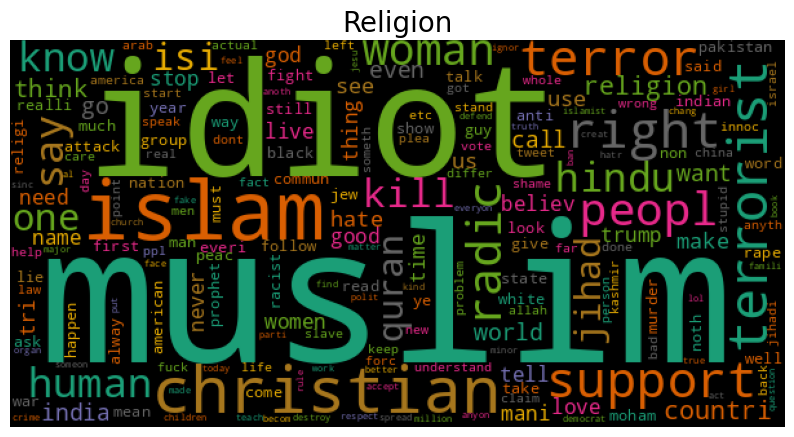

In [38]:
# Using WordCloud tequniue to show most effective words based on type (religion)

plt.figure(figsize=(10,10))
gender_type = df[df['cyberbullying_type']=='religion']
text_gender = gender_type.cleaned_text.values
cloud3=WordCloud(background_color='black',colormap="Dark2",collocations=False,width=600,height=300).generate(" ".join(text_gender))

plt.axis('off')
plt.title("Religion",fontsize=20)
plt.imshow(cloud3)

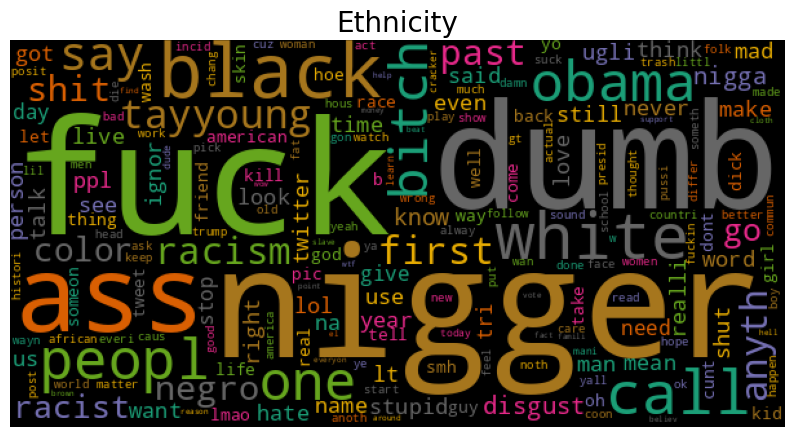

In [39]:
# Using WordCloud tequniue to show most effective words based on type (ethnicity)

plt.figure(figsize=(10,10))
gender_type = df[df['cyberbullying_type']=='ethnicity']
text_gender = gender_type.cleaned_text.values
cloud4=WordCloud(background_color='black',colormap="Dark2",collocations=False,width=600,height=300).generate(" ".join(text_gender))

plt.axis('off')
plt.title("Ethnicity",fontsize=20)
plt.imshow(cloud4)

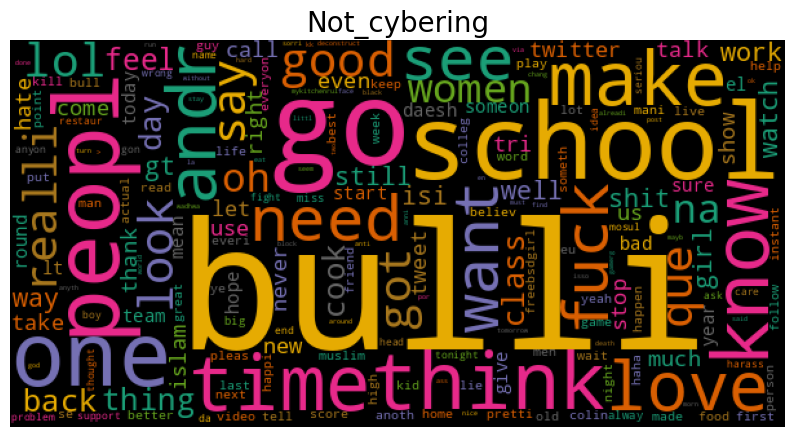

In [40]:
# Using WordCloud tequniue to show most effective words based on type (not_cyberbullying)

plt.figure(figsize=(10,10))
gender_type = df[df['cyberbullying_type']=='not_cyberbullying']
text_gender = gender_type.cleaned_text.values
cloud5=WordCloud(background_color='black',colormap="Dark2",collocations=False,width=600,height=300).generate(" ".join(text_gender))

plt.axis('off')
plt.title("Not_cybering",fontsize=20)
plt.imshow(cloud5)

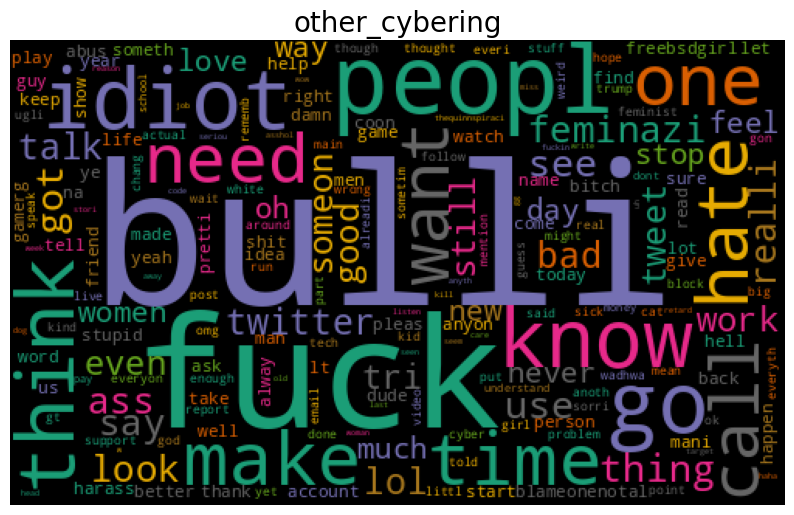

In [41]:
# Using WordCloud tequniue to show most effective words based on type (other_cyberbullying)

plt.figure(figsize=(10,10))
gender_type = df[df['cyberbullying_type']=='other_cyberbullying']
text_gender = gender_type.cleaned_text.values
cloud6=WordCloud(background_color='black',colormap="Dark2",collocations=False,width=500,height=300).generate(" ".join(text_gender))

plt.axis('off')
plt.title("other_cybering",fontsize=20)
plt.imshow(cloud6)

##5) feature extraction

In [32]:
# we show large diff between (Other_cyberbullying) and all of them ,may be  mess up model and most frequantly word in 
#other_cyberbullying mixed between all most freq words in all types and doesn't have any unique word to mark it
 
df.drop(df[df['cyberbullying_type'] == 'other_cyberbullying'].index, inplace = True)
df.reset_index(inplace=True)
df.drop(['index'],axis=1,inplace=True)


<ipython-input-32-f925c6bc81e4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df[df['cyberbullying_type'] == 'other_cyberbullying'].index, inplace = True)
<ipython-input-32-f925c6bc81e4>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['index'],axis=1,inplace=True)


In [33]:
#lable encoding for y to convert type of output to int to enable comparing between i/p & o/p
df['cyberbullying_type_enc'] = df['cyberbullying_type'].replace({ 'religion':1,'age':2,'ethnicity':3,
                                                                  'not_cyberbullying':4,'gender':5})
                                                                  
    


<ipython-input-33-04211e92c451>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cyberbullying_type_enc'] = df['cyberbullying_type'].replace({ 'religion':1,'age':2,'ethnicity':3,


In [34]:
X = df['cleaned_text']  # Feature (raw data)
y = df['cyberbullying_type_enc']  # Target Label


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 44,shuffle =True)

In [36]:
# we used TfidfVectorizer model to make feature extraction in text tweet ---> it contains to two parts 
# part 1 TF(term frequency) show num of words frequency, part 2 idf(inverse document frequency) depend on
# what imports of word in text not what more frequency by applying some equation, 
# teqnique of tfidf show unique words in all text then applyiny equation compute what imorts of word
# we have 29193 features when used all of them crashed ram ,we tring many numbers to show the best 
# num of features 7000 not crashed ram but take long time,appling pca then num of features = .5 of variance
# the best num for ram & time with same accuracy
tfidf = TfidfVectorizer(max_features= 2000)# best num of features
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
tfidf_array_train = X_train_tfidf.toarray()   # Converting the sparse matrix to a numpy array (dense matrix)
tfidf_array_test = X_test_tfidf.toarray()    # Converting the sparse matrix to a numpy array (dense matrix)
scaled_X_train = scaler.fit_transform(tfidf_array_train)  # Fitting on only training data to avoid data leakage from test data
scaled_X_test = scaler.transform(tfidf_array_test) # and then tranforming both training and testing data


In [38]:
# show num of features in text
#tfidf_array_train = X_train_tfidf.toarray().shape
#tfidf_array_test = X_test_tfidf.toarray().shape
#print(tfidf_array_test),print(tfidf_array_train)

##6) feature selection

In [39]:
# Performing Dimensionality Reduction using Principal Component Analysis

from sklearn.decomposition import PCA
NUM_COMPONENTS = 7000  # Total number of features
pca = PCA(NUM_COMPONENTS)
reduced = pca.fit(scaled_X_train)

In [40]:
variance_explained = np.cumsum(pca.explained_variance_ratio_)  # Calculating the cumulative explained variance by the components

Text(0, 0.5, 'Cumulative explained variance')

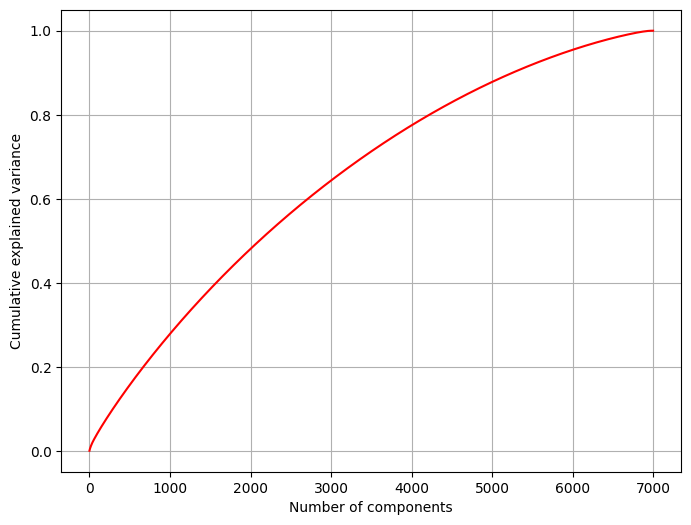

In [41]:
# Plotting
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(range(NUM_COMPONENTS),variance_explained, color='r')
ax.grid(True)
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")

In [42]:
#final_pca = PCA(0.9)   
#reduced_90 = final_pca.fit_transform(scaled_X_train) # Number of Components explaining 90% variance in the training data

In [43]:
#final_pca = PCA(0.8)   
#reduced_80 = final_pca.fit_transform(scaled_X_train)

In [44]:
#reduced_80_test = final_pca.transform(scaled_X_test)# show same accuracy

In [45]:
#reduced_90_test = final_pca.transform(scaled_X_test)# same accuracy

##7) training model

In [ ]:

# RANDOM FORESTS
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(criterion='gini',max_depth=3)
rf_model = RandomForestClassifier(random_state = 44)

rf_model.fit(scaled_X_train,y_train)
# computing y_predict
y_pred = rf_model.predict(scaled_X_test)
# making classification report 
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           1       0.95      0.96      0.96      1979
           2       0.99      0.97      0.98      1956
           3       0.99      0.98      0.99      1997
           4       0.83      0.89      0.86      1936
           5       0.93      0.87      0.90      1850

    accuracy                           0.94      9718
   macro avg       0.94      0.94      0.94      9718
weighted avg       0.94      0.94      0.94      9718



Confusion Matrix is : 
 [[1905    0    3   55   16]
 [   2 1899    0   52    3]
 [   3    0 1969   14   11]
 [  91   17    9 1726   93]
 [   5    3    1  235 1606]]


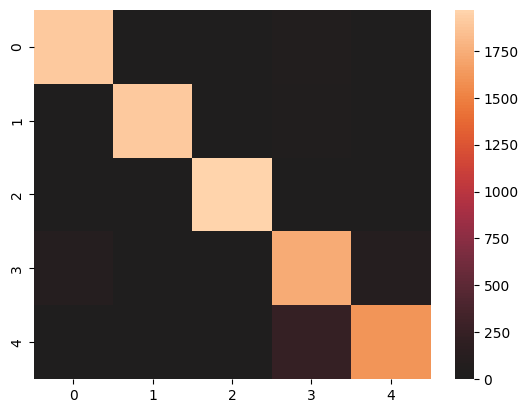

In [ ]:
#Calculating Confusion Matrix
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n', CM)

# drawing confusion matrix
sns.heatmap(CM, center = True)
plt.show()


##8) installation

In [1]:
#!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
#import nltk
#nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> all


       | 
       | Downloading package abc to /root/nltk_data...
       |   Unzipping corpora/abc.zip.
       | Downloading package alpino to /root/nltk_data...
       |   Unzipping corpora/alpino.zip.
       | Downloading package averaged_perceptron_tagger to
       |     /root/nltk_data...
       |   Unzipping taggers/averaged_perceptron_tagger.zip.
       | Downloading package averaged_perceptron_tagger_ru to
       |     /root/nltk_data...
       |   Unzipping taggers/averaged_perceptron_tagger_ru.zip.
       | Downloading package basque_grammars to /root/nltk_data...
       |   Unzipping grammars/basque_grammars.zip.
       | Downloading package bcp47 to /root/nltk_data...
       | Downloading package biocreative_ppi to /root/nltk_data...
       |   Unzipping corpora/biocreative_ppi.zip.
       | Downloading package bllip_wsj_no_aux to /root/nltk_data...
       |   Unzipping models/bllip_wsj_no_aux.zip.
       | Downloading package book_grammars to /root/nltk_data...
       |   Un


---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

In [3]:
#!pip install emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 kB 20.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234911 sha256=972140f7e5768d609a9699ab0083a4d7401cc0175fd64955f3ba0660e0b8d81f
  Stored in directory: /root/.cache/pip/wheels/02/3d/88/51a592b9ad17e7899126563698b4e3961983ebe85747228ba6
Successfully built emoji
